<a href="https://colab.research.google.com/github/kriskirla/AllProjects/blob/master/Algotrade/Stock_Forecast_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program will predict the stock for a specific day using ML

In [ ]:
!pip install yfinance

In [21]:
# Import libaries
from sklearn.svm import SVR
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [99]:
ticker = "PLTR";

# Get data from yahoo finance
df = yf.download(ticker, start="2021-01-01", end=dt.today().strftime('%Y-%m-%d'))
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,23.910000,24.500000,22.500000,23.370001,23.370001,44970400
2021-01-05,23.180000,24.670000,22.889999,24.600000,24.600000,29050400
2021-01-06,24.120001,24.459999,23.250000,23.540001,23.540001,32732900
2021-01-07,24.020000,25.190001,23.670000,25.000000,25.000000,32240000
2021-01-08,25.700001,26.440001,24.700001,25.200001,25.200001,41313800
2021-01-11,24.610001,26.600000,24.309999,25.930000,25.930000,32609000
2021-01-12,26.340000,26.420000,25.510000,26.180000,26.180000,26995000
2021-01-13,25.709999,27.430000,25.129999,25.500000,25.500000,51216600
2021-01-14,25.450001,25.620001,24.370001,24.920000,24.920000,32908000


In [ ]:
# ===== ONLY RUN THIS TO TEST RESULT =====
# Get the last row of data to test the correctness
actual_price = df.tail(1)
actual_price
# Get the data except for the last row
df = df.head(len(df) - 1)
df

In [100]:
# Create independant dataset and dependant dataset
df_days = df.index
df_adj_close = df.loc[:, 'Adj Close']

days = [[i.dayofyear] for i in df_days ]
adj_close_price = [float(price) for price in df_adj_close]

In [101]:
# Linear Model
lin_svr = SVR(kernel='linear', C=1000)
lin_svr.fit(days, adj_close_price)
# Polynomial Model
poly_svr = SVR(kernel='poly', C=1000, degree=2)
poly_svr.fit(days, adj_close_price)
# Radial Basis Function Model
rbf_svr = SVR(kernel='rbf', C=1000, gamma=0.85)
rbf_svr.fit(days, adj_close_price)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

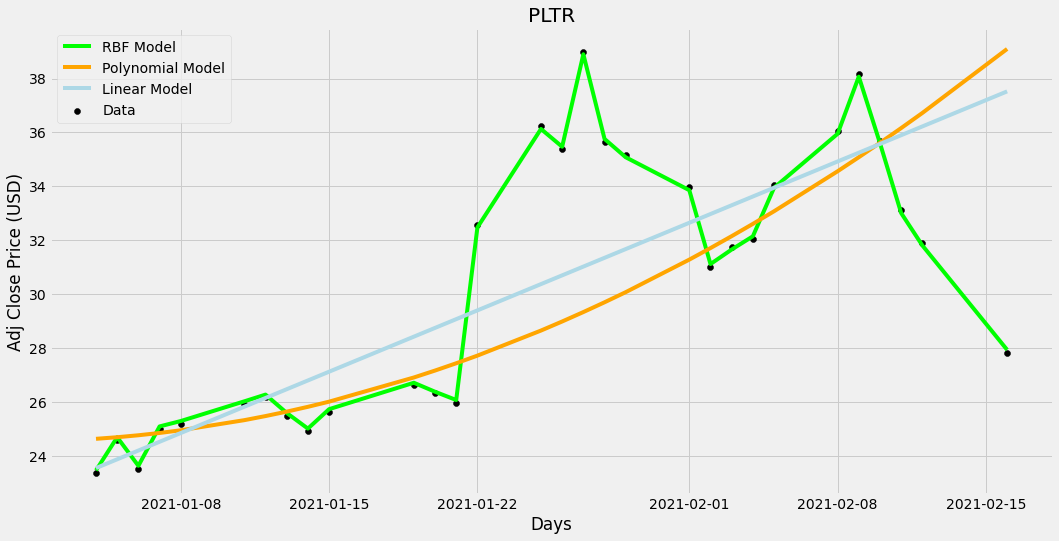

In [110]:
# Plot the models
plt.figure(figsize=(16,8))
plt.scatter(df.index, adj_close_price, color='black', label='Data')
plt.plot(df.index, rbf_svr.predict(days), color='lime', label='RBF Model')
plt.plot(df.index, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(df.index, lin_svr.predict(days), color='lightblue', label='Linear Model')
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Adj Close Price (USD)')
plt.legend()
plt.show()

2021-02-17
Predicted price using RBF Model: [29.29971185]
Predicted price using Polynomial Model: [39.72259181]
Predicted price using Linear Model: [37.84759872]
2021-02-18
Predicted price using RBF Model: [30.23554421]
Predicted price using Polynomial Model: [40.36199402]
Predicted price using Linear Model: [38.17239868]
2021-02-19
Predicted price using RBF Model: [30.31367374]
Predicted price using Polynomial Model: [41.01457978]
Predicted price using Linear Model: [38.49719864]


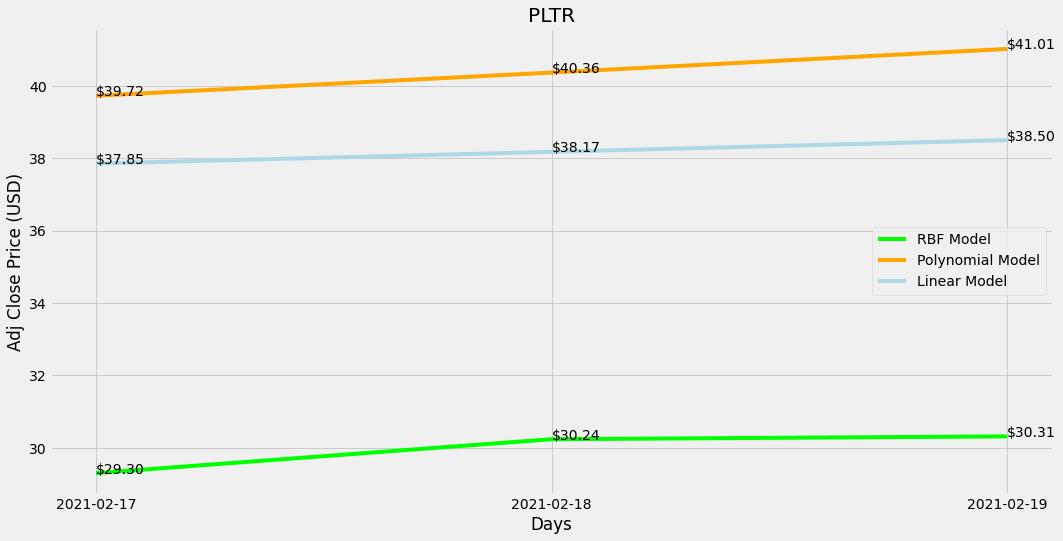

In [111]:
# Test the predicted price for the next n days
n = 3
predict_days = list()
predict_rbf = list()
predict_poly = list()
predict_lin = list()

for i in range(1, n + 1):
  day = [[days[-1][0] + i]]
  date = dt.strptime('{} {}'.format(days[-1][0] + i, df_days.year[0]),'%j %Y').strftime('%Y-%m-%d')
  predict_days.append(date)
  predict_rbf.append(rbf_svr.predict(day))
  predict_poly.append(poly_svr.predict(day))
  predict_lin.append(lin_svr.predict(day))
  print(date)
  print(f"Predicted price using RBF Model: {rbf_svr.predict(day)}")
  print(f"Predicted price using Polynomial Model: {poly_svr.predict(day)}")
  print(f"Predicted price using Linear Model: {lin_svr.predict(day)}")
#print(f"Actual Price: {actual_price.iloc[0]['Adj Close']}")

# Plot the prediction graph
plt.figure(figsize=(16,8))
plt.plot(predict_days, predict_rbf, color='lime', label='RBF Model')
plt.plot(predict_days, predict_poly, color='orange', label='Polynomial Model')
plt.plot(predict_days, predict_lin, color='lightblue', label='Linear Model')
for i in range(len(predict_days)):
  plt.text(predict_days[i], predict_rbf[i], "${:.2f}".format(predict_rbf[i][0]))
  plt.text(predict_days[i], predict_poly[i], "${:.2f}".format(predict_poly[i][0]))
  plt.text(predict_days[i], predict_lin[i], "${:.2f}".format(predict_lin[i][0]))
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Adj Close Price (USD)')
plt.legend()
plt.show()